In [ ]:
import utilities as u

In [16]:
import re

In [13]:
import itertools

In [ ]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [52]:
import pathlib

In [60]:
directory = 'output_biases/'

dic = u.dictionary(directory)

In [61]:
analysis_directory = 'output/'

In [62]:
P = pathlib.Path(analysis_directory)

In [63]:
fgnamefile = 'tsz'
nu = 148

In [96]:
def tfm_dict_to_matrix(estimators, dictionary, formato):
    
    keys = list(dictionary.keys())
    N = len(estimators)
    
    all_combs = list(itertools.combinations_with_replacement(list(estimators), 2))
    
    element = dictionary[keys[0]]
    
    Q_ij = np.zeros((N, N, len(element)))
    
    for estA, estB in all_combs:

            quantity = dictionary[formato(estA, estB)]

            indexA = estimators.index(estA)
            indexB = estimators.index(estB)

            Q_ij[indexA, indexB] = quantity
            Q_ij[indexB, indexA] = quantity
    
    return Q_ij

def tfm_dict_to_array(estimators, dictionary, formato):
    
    keys = list(dictionary.keys())
    N = len(keys)
    
    element = dictionary[keys[0]]
    
    Q_i = np.zeros((N, len(element)))
    
    for estA in estimators:

            quantity = dictionary[formato(estA)]
            
            indexA = estimators.index(estA)

            Q_i[indexA] = quantity
    
    return Q_i
    

In [97]:
def get_array_from_dict(element):
    lista = []
    
    for name in element.keys():
        uppercase = re.sub('[^A-Z]', '', name)
        string = re.sub(r'[A-Z]+-', '', name)
        lista += re.split('-', string)
        
    estimators = list(set(lista))
    
    if len(estimators) == len(lista):
        formato = lambda estA: f'{uppercase}-{estA}'
        result = tfm_dict_to_array(estimators, element, formato)
    else:
        formato = lambda estA, estB: f'{uppercase}-{estA}-{estB}'
        result = tfm_dict_to_matrix(estimators, element, formato)
        
    return result

In [98]:
Nsims = 1

P = pathlib.Path(analysis_directory)

for i in range(1):
    
    dictionary_temp = dic.read(f'{fgnamefile}_{nu}_{i}')
    
    #Loop over the elements of the saved dictionary
    for k, element in dictionary_temp.items():
        
        total = 0.
        
        for j in range(Nsims):
        
            #If you have a dictionary
            if isinstance(element, dict):  
                total += get_array_from_dict(element)
            #If you do not have a dictionary
            else:
                total += element
                
        outname = f'{k}.npy'
        np.save(P/outname, total)

In [99]:
Noah = pandas.read_csv('../extract_sehgal/Ckk_biases_lmaxT_3500.csv')

In [100]:
dictionary_temp.keys()

dict_keys(['N', 'T', 'P', 'S', 'PC', 'kk', 'kg', 'ells'])

In [101]:
read_element = lambda key: np.load(P/f'{key}.npy')


bias = read_element('T')
ells = read_element('ells')
    

    

In [108]:
getNoah = lambda e, b, f: Noah[f'{e} {b}, {f}']
getNoah_tSZ = lambda e, b: getNoah(e, b, 'tSZ')

NoahT = getNoah_tSZ('QE', 'trispectrum')

NoahCents = Noah['lCen']

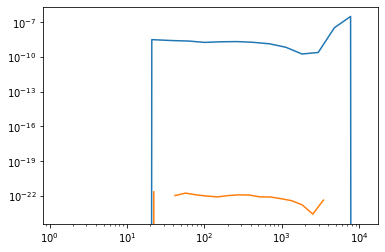

In [113]:
plt.plot(NoahCents, NoahT)
plt.plot(ells, bias[0, 0])
plt.yscale('log')
plt.xscale('log')